In [173]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df=pd.read_csv("cardekho.csv")

In [175]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [176]:
df.shape

(8128, 12)

In [177]:
# there are 8128 rows and 12 columns

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [179]:
# target columns is seller_type ,which is a numerical column ,so this is a regression problem

### Data Cleaning

In [180]:
# checking for null values
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [181]:
# name and year are not required for our analysis,so dropping it
df.drop(columns=["name","year"],inplace=True)

In [182]:
# mileage
df["mileage"]=df["mileage(km/ltr/kg)"]
df.drop(columns="mileage(km/ltr/kg)",inplace =True)

In [183]:
df["mileage"].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 ,
       18.5 , 12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36,
       17.68, 14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  ,
       25.1 , 20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71,
       23.1 , 19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 ,
       21.21, 15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32,
       21.9 , 14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92,
       17.01, 22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  ,
       13.96, 18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 ,
       19.56, 22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 ,
       19.44, 13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 ,
       26.6 , 17.6 ,

In [184]:
# the nullvalues are greater than 5% so filling the null values
(221/8128)*100

2.718996062992126

<Axes: ylabel='mileage'>

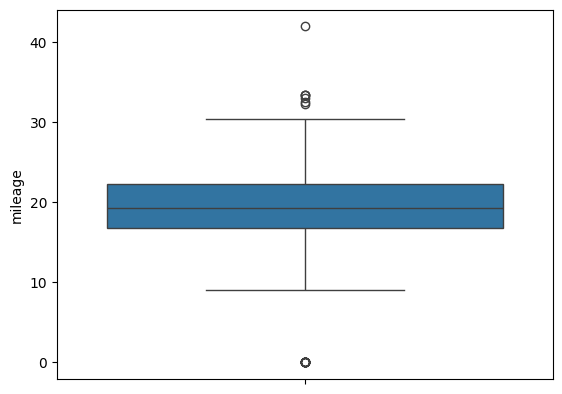

In [185]:
# checking for outliers
sns.boxplot(df["mileage"])

In [186]:
# there are outliers so filling the null values with median
df["mileage"]=df["mileage"].fillna(df["mileage"].median())

In [187]:
df["mileage"].isnull().sum()

0

In [188]:
df["engine"].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

<Axes: ylabel='engine'>

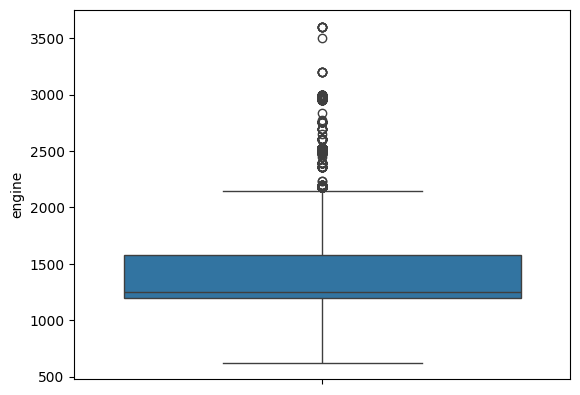

In [189]:
#checking for outliers
sns.boxplot(df["engine"])

In [190]:
# since there are outliers filling null values with median
df["engine"]=df["engine"].fillna(df["engine"].median())

In [191]:
df["engine"].isnull().sum()

0

In [192]:
# max_power
df["max_power"].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [193]:
import re
def conve(n):
    r=re.findall("\d+",str(n))
    if len(r)!=0:
        return r[0]
    else:
        return np.nan

In [194]:
df["max_power"]=df["max_power"].apply(conve)

In [195]:
df["max_power"]=df["max_power"].fillna(0)

In [196]:
df["max_power"]=df["max_power"].astype(int)

<Axes: ylabel='max_power'>

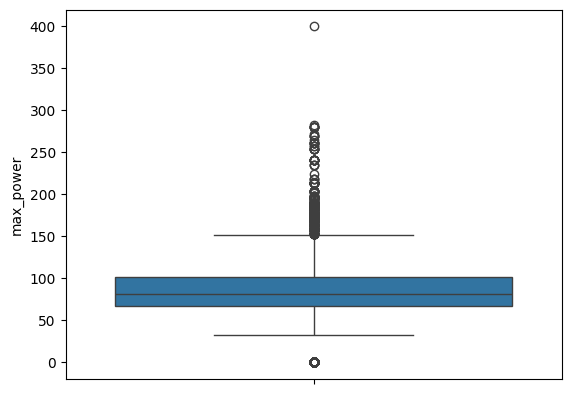

In [197]:
# checking for outliers
sns.boxplot(df["max_power"])

In [198]:
df["max_power"]=df["max_power"].apply(lambda x:df["max_power"].median() if x==0 else x)

In [199]:
# seats
df["seats"].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [200]:
# since it is a categorical value filling null values with mode
df["seats"]=df["seats"].fillna(df["seats"].mode()[0])

In [201]:
df["seats"].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

### Univariate Analysis

In [202]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'engine', 'max_power', 'seats', 'mileage'],
      dtype='object')

In [203]:
df["selling_price"].unique()

array([  450000,   370000,   158000,   225000,   130000,   440000,
          96000,    45000,   350000,   200000,   500000,    92000,
         280000,   180000,   400000,   778000,   150000,   680000,
         174000,   950000,   525000,   600000,   575000,   275000,
         300000,   220000,   254999,   670000,    70000,   730000,
         650000,   330000,   366000,  1149000,   425000,  2100000,
         925000,   675000,   819999,   390000,  1500000,   700000,
        1450000,  1090000,   850000,  1650000,  1750000,  1590000,
        1689999,  1425000,   265000,   190000,   630000,   540000,
         448000,   745000,  1025000,   235000,  1700000,    50000,
        1200000,   610000,  2500000,   484999,   315000,   475000,
         290000,   455000,   351000,   535000,   175000,   565000,
         120000,   725000,   185000,   615000,   270000,   625000,
         866000,   375000,   522000,   451999,   780000,   595000,
        1140000,   360000,   105000,   135000,   690000,  3975

<Axes: ylabel='selling_price'>

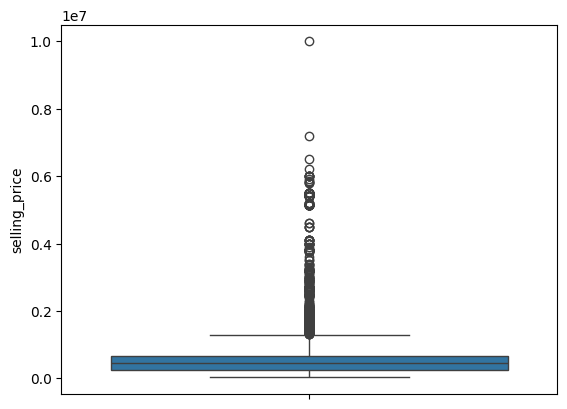

In [204]:
# checking for outliers
sns.boxplot(df["selling_price"])

In [205]:
# since there are outliers checking for gaussian
from scipy.stats import anderson
def gaussian_check(n):
    sns.distplot(n,kde=True)
    plt.show()
    stats.probplot(n,dist="norm",plot=plt)
    plt.show()
    x=anderson(n)
    print(x.statistic)
    print(x.critical_values)
    if x.statistic<x.critical_values[2]:
        return "gaussian"
    else:
        return "non gaussian"

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\238045554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


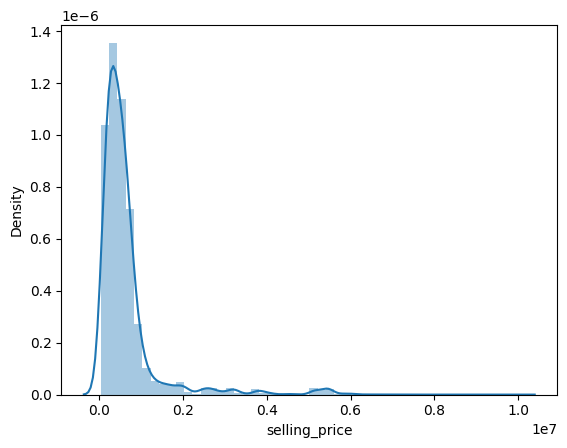

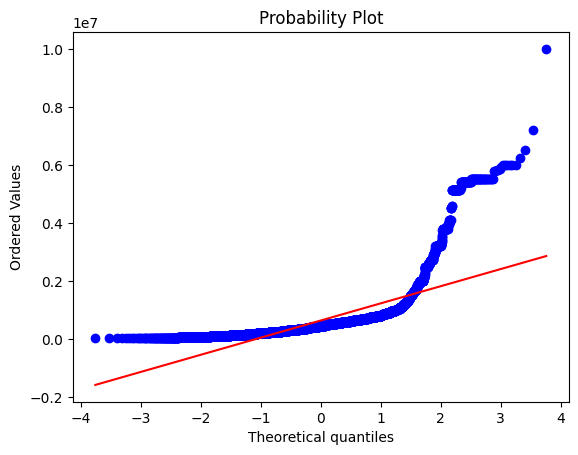

1056.4505998485238
[0.576 0.656 0.787 0.918 1.091]


'non gaussian'

In [206]:
gaussian_check(df["selling_price"])

In [207]:
# since it is non gaussian filling outliers with iqr
def Outliers_handle(n):
    q1=np.percentile(n,25)
    q3=np.percentile(n,75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    n[n<lb]=lb
    n[n>ub]=ub

In [208]:
Outliers_handle(df["selling_price"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1305001.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  n[n>ub]=ub


<Axes: ylabel='selling_price'>

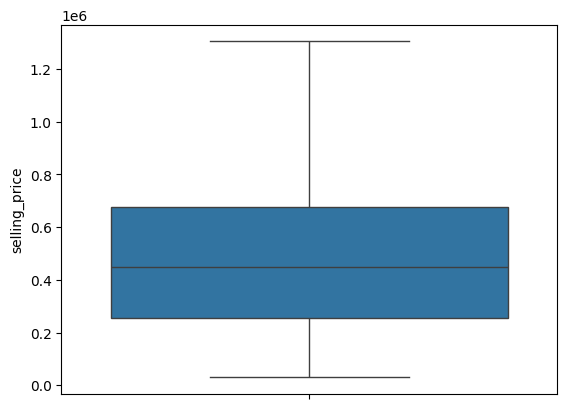

In [209]:
sns.boxplot(df["selling_price"])

In [210]:
# km_driven
df["km_driven"].unique()

array([ 145500,  120000,  140000,  127000,   45000,  175000,    5000,
         90000,  169000,   68000,  100000,   80000,   40000,   70000,
         53000,   50000,   72000,   35000,   28000,   25000,    2388,
         16200,   10000,   15000,   42000,   60000,   76000,   28900,
         86300,   23300,   32600,   10300,   77000,   99000,   27800,
         49800,  151000,   54700,   64000,   63000,  127700,   33900,
         59000,  110000,  147000,   30000,  135000,    9850,   78000,
        170000,   49000,   32000,   38000,   44000,   12000,   55500,
         61500,  150000,   37800,  114000,   48000,   69000,   13000,
         76139,   65000,    1303,   31800,   20000,   17000,   21000,
         37000,   29500,   27000,    7500,   19000,   41000,   39000,
         22000,   47000,   72200,   49900,    9000,   11000,   95000,
         18000,   46100,   16000,    9654,   24300,   42163,    8000,
         71000,    9500,   36600,   14000,  120600,   86000,    7800,
         31377,   75

<Axes: ylabel='km_driven'>

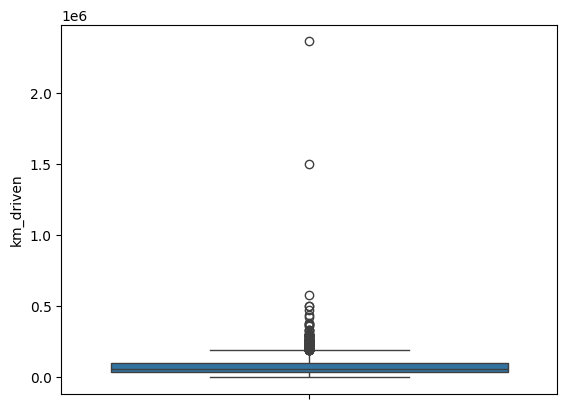

In [211]:
# checking for outliers
sns.boxplot(df["km_driven"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\238045554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


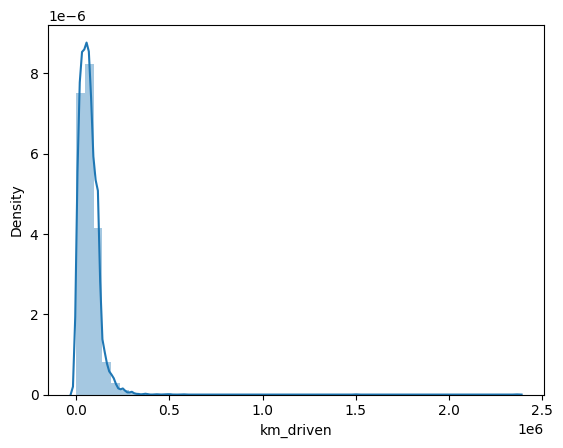

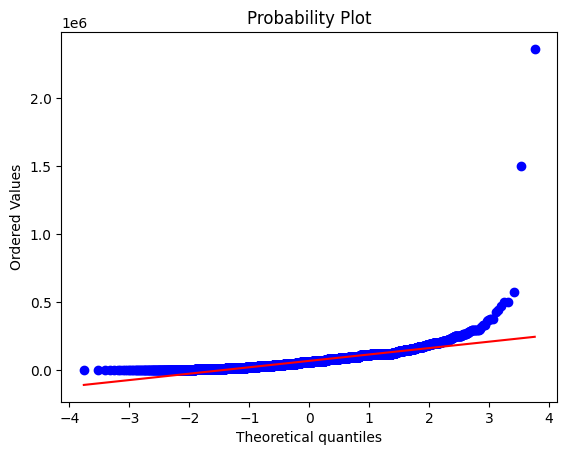

204.36226594688924
[0.576 0.656 0.787 0.918 1.091]


'non gaussian'

In [212]:
# there are outliers so checking for gaussian
gaussian_check(df["km_driven"])

In [213]:
# since it is non gaussian filling outliers with iqr
Outliers_handle(df["km_driven"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [214]:
# fuel
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [215]:
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

<Axes: xlabel='fuel', ylabel='count'>

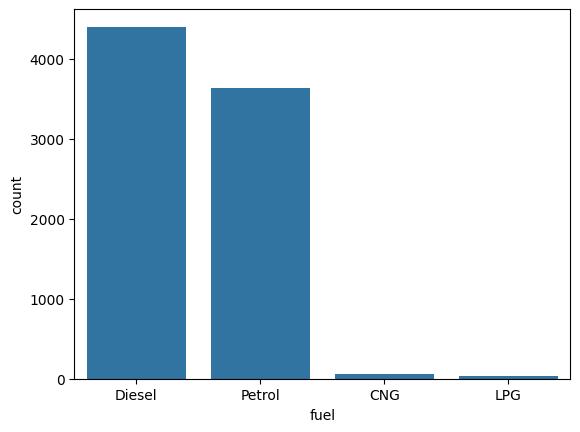

In [216]:
sns.barplot(df["fuel"].value_counts())

In [217]:
# most of the cars uses Diesel

In [218]:
# seller_type
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [219]:
df["seller_type"].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

<Axes: xlabel='seller_type', ylabel='count'>

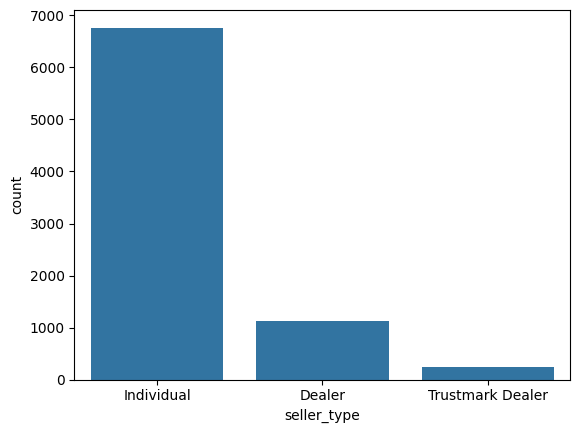

In [220]:
sns.barplot(df["seller_type"].value_counts())

In [221]:
# most of the cars are bought individually

In [222]:
# transmission
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [223]:
df["transmission"].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

<Axes: xlabel='transmission', ylabel='count'>

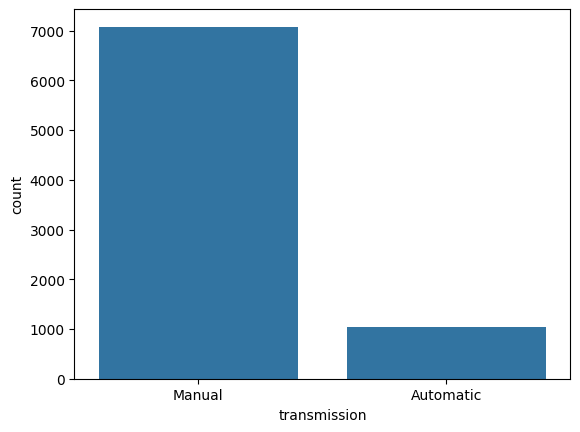

In [224]:
sns.barplot(df["transmission"].value_counts())

In [225]:
# mosts of the cars are manual

In [227]:
# owner
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [228]:
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

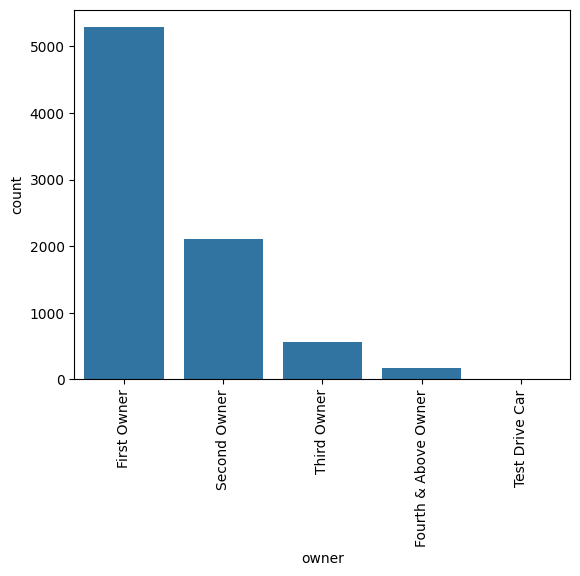

In [229]:
sns.barplot(df["owner"].value_counts())
plt.xticks(rotation=90)

In [230]:
# most of the cars bought are new

In [231]:
# engine
df["engine"].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993., 1198., 1199.,  998., 1591., 2179., 1368.,
       2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798., 1196.,
       1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,  999.,
       2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967., 2497.,
       1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799., 1193.,
       2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,  624.,
       1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956., 1997.,
       1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150., 1994.,
       1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909., 2393.,
       3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597., 2596.,
       2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796.,
       1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343., 2446.,
       3498., 2198., 2776., 1950.])

<Axes: ylabel='engine'>

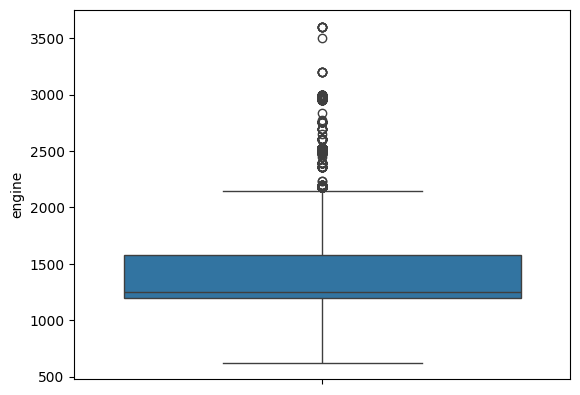

In [232]:
sns.boxplot(df["engine"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\238045554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


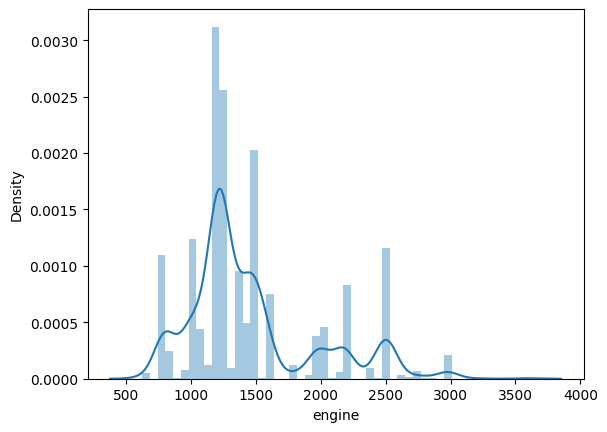

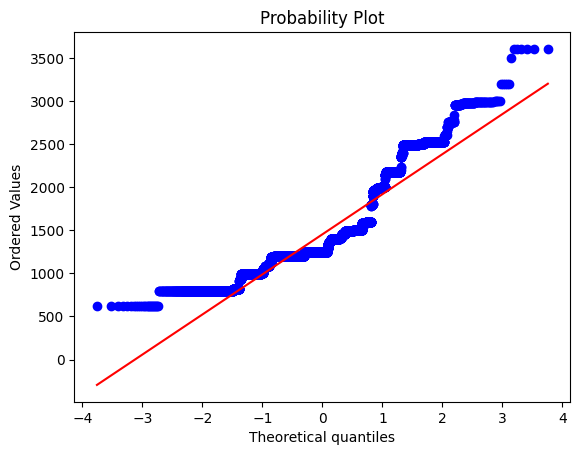

419.5492366362505
[0.576 0.656 0.787 0.918 1.091]


'non gaussian'

In [233]:
#checking for gaussian
gaussian_check(df["engine"])

In [234]:
# non gaussian so filling outliers with iqr
Outliers_handle(df["engine"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [235]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'engine', 'max_power', 'seats', 'mileage'],
      dtype='object')

In [236]:
df["max_power"].unique()

array([ 74., 103.,  78.,  90.,  88.,  81.,  57.,  37.,  67.,  68., 108.,
        60.,  73.,  82.,  46.,  64.,  98.,  83.,  47.,  34.,  35.,  40.,
       121., 138., 160., 117., 116., 168., 100., 120., 175., 171., 174.,
       187., 170.,  86.,  93., 189.,  58.,  94.,  65., 155.,  69., 126.,
        62., 188., 214., 177., 280., 148., 254., 190., 204., 141., 241.,
       282., 150., 147., 183., 181., 157., 164.,  91., 400.,  75.,  85.,
        87.,  53., 118.,  84.,  80.,  97., 162., 140.,  70., 153.,  99.,
       102., 105.,  63.,  79.,  66., 110., 158.,  61.,  55.,  71.,  77.,
       113., 130.,  52.,  76.,  56., 218., 112.,  92., 169.,  95.,  72.,
       115., 152., 156., 194.,  89., 123., 136., 261., 104.,  45., 184.,
       167., 197., 165., 163., 127., 198., 179., 143., 125., 139., 258.,
       270., 265., 101., 186., 224.,  32., 106.,  38., 142., 132., 178.,
       203., 149.,  48., 201., 144., 272., 235., 161., 122., 134., 135.])

<Axes: ylabel='max_power'>

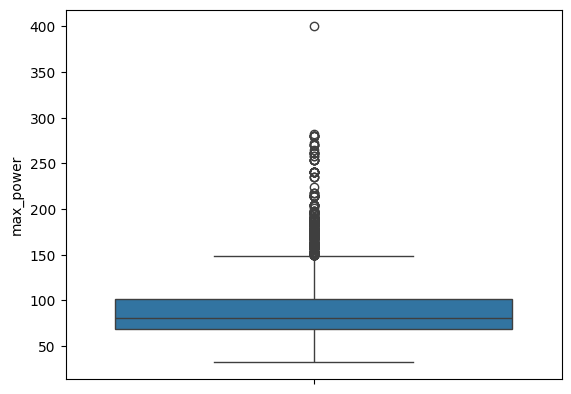

In [237]:
#checking for outliers
sns.boxplot(df["max_power"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\238045554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


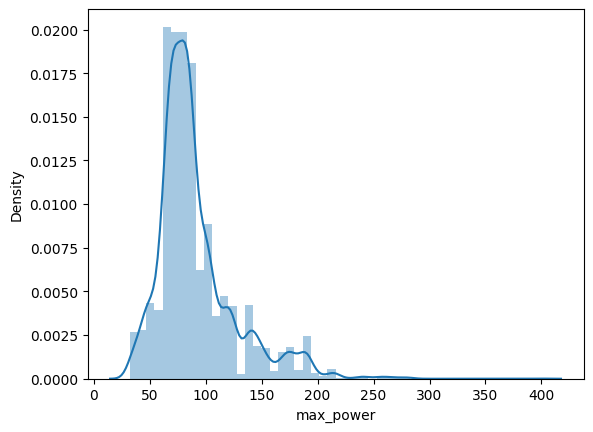

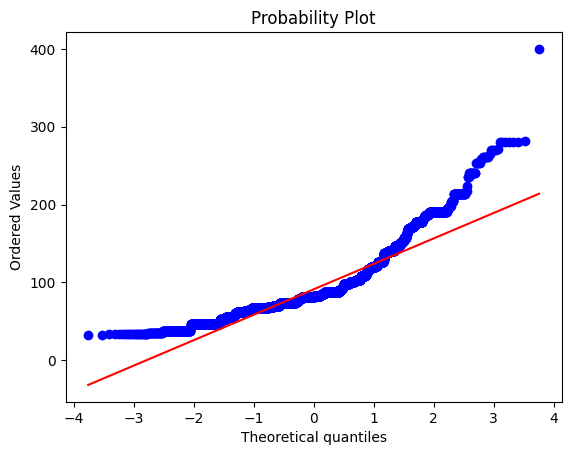

354.8465640002378
[0.576 0.656 0.787 0.918 1.091]


'non gaussian'

In [238]:
# checking for gaussian
gaussian_check(df["max_power"])

In [239]:
# since it non gaussian filling outliers with iqr
Outliers_handle(df["max_power"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [240]:
# seats
df["seats"].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [241]:
df["seats"]=df["seats"].apply(lambda x:"less seater" if x<7 else "medium seater" if x<9 else "high seater")

In [242]:
df["seats"].unique()

array(['less seater', 'medium seater', 'high seater'], dtype=object)

In [243]:
df["seats"].value_counts()

seats
less seater      6672
medium seater    1356
high seater       100
Name: count, dtype: int64

<Axes: xlabel='seats', ylabel='count'>

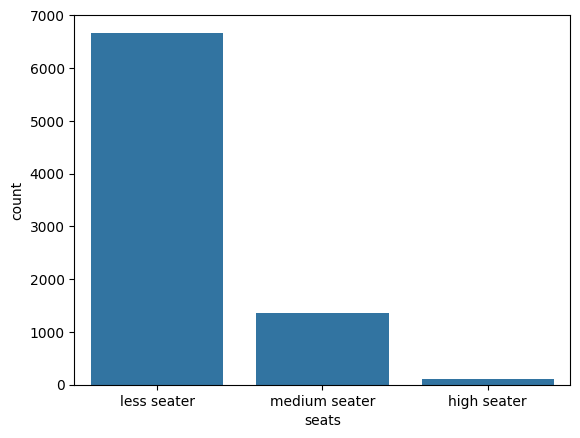

In [244]:
sns.barplot(df["seats"].value_counts())

In [245]:
# most cars are less seater

<Axes: ylabel='mileage'>

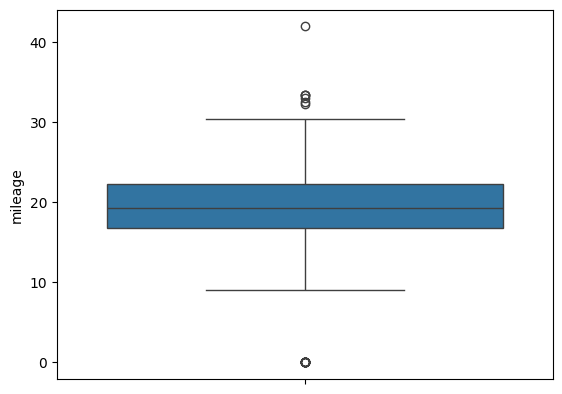

In [246]:
# mileage
sns.boxplot(df["mileage"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\238045554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


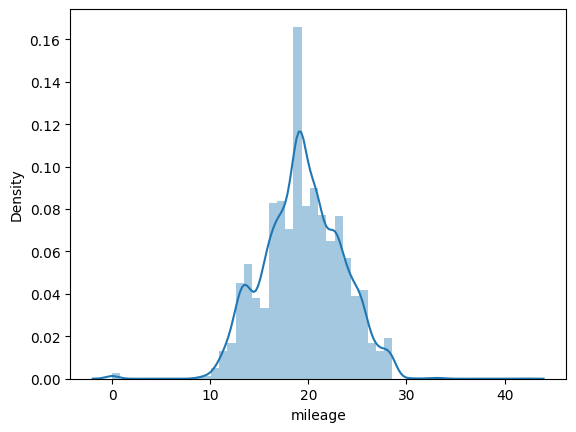

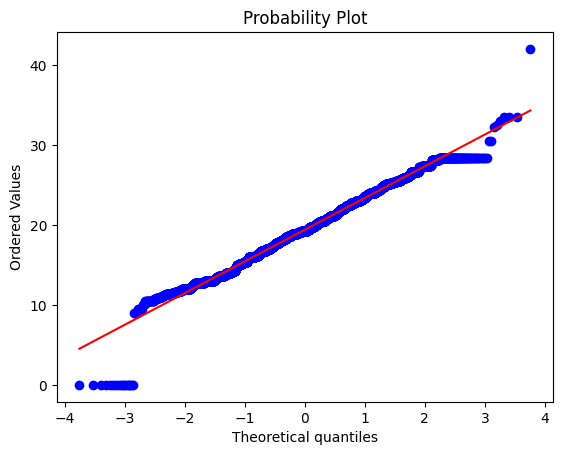

7.559976973579978
[0.576 0.656 0.787 0.918 1.091]


'non gaussian'

In [247]:
# checking for gaussian
gaussian_check(df["mileage"])

In [248]:
# since it is non gaussian filling outliers with iqr
Outliers_handle(df["mileage"])

C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_1520\3273306988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


### Bivariate Analysis

In [250]:
# checking if there is any relationship between selling price and km_driven
# since both are numerical values checking for correlation
df["km_driven"].corr(df["selling_price"])

-0.31552855552835235

In [251]:
# there is a  weak negative correlation betn the columns

In [254]:
# checking if there is any relationship betn fuel and selling_price
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [255]:
g1=df[df["fuel"]=="Diesel"]["selling_price"]
g2=df[df["fuel"]=="Petrol"]["selling_price"]
g3=df[df["fuel"]=="LPG"]["selling_price"]
g4=df[df["fuel"]=="CNG"]["selling_price"]

In [256]:
from scipy.stats import f_oneway
f_stats,p_value=f_oneway(g1,g2,g3,g4)

In [257]:
p_value

1.4481201271553372e-198

In [258]:
# less than 5% so the means of the groups have significant difference

In [259]:
# checking if there is any reln betn seller_type and selling price
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [260]:
f1=df[df["seller_type"]=="Individual"]["selling_price"]
f2=df[df["seller_type"]=="Dealer"]["selling_price"]
f3=df[df["seller_type"]=="Trustmark Dealer"]["selling_price"]

In [261]:
f_stats,p_value=f_oneway(f1,f2,f3)

In [262]:
p_value

4.421371828636351e-242

In [263]:
# less than 5% so the means of the groups are significant

In [264]:
# checking if there is any reln betn transmission and selling price
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [265]:
d1=df[df["transmission"]=="Manual"]["selling_price"]
d2=df[df["transmission"]=="Automatic"]["selling_price"]

In [266]:
t_stats,p_value=stats.ttest_ind(d1,d2,alternative="less")

In [267]:
p_value

0.0

In [268]:
# less than 5% so h1 excepted so mean of d1<mean of d2

In [269]:
t_stats,p_value=stats.ttest_ind(d1,d2,alternative="greater")

In [270]:
p_value

1.0

In [271]:
# greater than 5% so h0 accepted so mean of d1<=d2

In [272]:
t_stats,p_value=stats.ttest_ind(d1,d2,alternative="two-sided")

In [273]:
p_value

0.0

In [274]:
# less than 5% so the mean of the groups have significant differnce

In [275]:
# overall mean of d1<=d2

In [276]:
# owner
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [277]:
p1=df[df["owner"]=="First Owner"]["selling_price"]
p2=df[df["owner"]=="Second Owner"]["selling_price"]
p3=df[df["owner"]=="Third Owner"]["selling_price"]
p4=df[df["owner"]=="Fourth & Above Owner"]["selling_price"]
p5=df[df["owner"]=="Test Drive Car"]["selling_price"]

In [278]:
f_stats,p_value=f_oneway(p1,p2,p3,p4,p5)

In [279]:
p_value

1.889577307778363e-264

In [280]:
# less than 5% so the mean of the groups have significant difference

In [281]:
# checking if there is any reln betn engine ng selling price
df["engine"].corr(df["selling_price"])

0.5629704170114511

In [282]:
# there is a positive relationship betn the columns

In [284]:
# checking if there is any reln betn max_power and selling_price
df["max_power"].unique()

array([ 74.   , 103.   ,  78.   ,  90.   ,  88.   ,  81.   ,  57.   ,
        37.   ,  67.   ,  68.   , 108.   ,  60.   ,  73.   ,  82.   ,
        46.   ,  64.   ,  98.   ,  83.   ,  47.   ,  34.   ,  35.   ,
        40.   , 121.   , 138.   , 149.625, 117.   , 116.   , 100.   ,
       120.   ,  86.   ,  93.   ,  58.   ,  94.   ,  65.   ,  69.   ,
       126.   ,  62.   , 148.   , 141.   , 147.   ,  91.   ,  75.   ,
        85.   ,  87.   ,  53.   , 118.   ,  84.   ,  80.   ,  97.   ,
       140.   ,  70.   ,  99.   , 102.   , 105.   ,  63.   ,  79.   ,
        66.   , 110.   ,  61.   ,  55.   ,  71.   ,  77.   , 113.   ,
       130.   ,  52.   ,  76.   ,  56.   , 112.   ,  92.   ,  95.   ,
        72.   , 115.   ,  89.   , 123.   , 136.   , 104.   ,  45.   ,
       127.   , 143.   , 125.   , 139.   , 101.   ,  32.   , 106.   ,
        38.   , 142.   , 132.   , 149.   ,  48.   , 144.   , 122.   ,
       134.   , 135.   ])

In [285]:
df["max_power"].corr(df["selling_price"])

0.7254030122967596

In [286]:
# there is positive rel btn max power and selling price

<Axes: xlabel='selling_price', ylabel='max_power'>

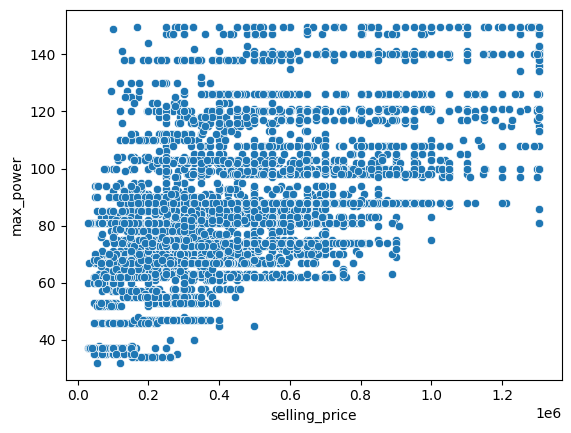

In [287]:
# scatterplot
sns.scatterplot(x=df["selling_price"],y=df["max_power"])

In [288]:
# somewhat postive correlated

In [289]:
# seats
df["seats"].unique()

array(['less seater', 'medium seater', 'high seater'], dtype=object)

In [290]:
q1=df[df["seats"]=="less seater"]["selling_price"]
q2=df[df["seats"]=="medium seater"]["selling_price"]
q3=df[df["seats"]=="high seater"]["selling_price"]

In [291]:
f_stats,p_value=f_oneway(q1,q2,q3)

In [292]:
p_value

4.3570783768121e-106

In [293]:
# less than 5% so the means have significant difference

In [294]:
# checking if there is any difference betn mileage and selling_price
df["mileage"].corr(df["selling_price"])

-0.11088203273494035

In [295]:
# weak negative reln vetn the columns

### Multivariate Analysis

In [296]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,mileage
0,450000.0,145500,Diesel,Individual,Manual,First Owner,1248.0,74.0,less seater,23.40
1,370000.0,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.0,less seater,21.14
2,158000.0,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.0,less seater,17.70
3,225000.0,127000,Diesel,Individual,Manual,First Owner,1396.0,90.0,less seater,23.00
4,130000.0,120000,Petrol,Individual,Manual,First Owner,1298.0,88.0,less seater,16.10
...,...,...,...,...,...,...,...,...,...,...
8123,320000.0,110000,Petrol,Individual,Manual,First Owner,1197.0,82.0,less seater,18.50
8124,135000.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493.0,110.0,less seater,16.80
8125,382000.0,120000,Diesel,Individual,Manual,First Owner,1248.0,73.0,less seater,19.30
8126,290000.0,25000,Diesel,Individual,Manual,First Owner,1396.0,70.0,less seater,23.57


In [297]:
df1=df.copy()

In [298]:
df1["fuel"]=df1["fuel"].apply(lambda x:0 if x=="Diesel" else 1 if x=="Petrol" else 2 if x=="LPG" else 3)
df1["seller_type"]=df1["seller_type"].apply(lambda x:0 if x=="Individual" else 1 if x=="Dealer" else 2 )
df1["transmission"]=df1["transmission"].apply(lambda x:0 if x=="Manual" else 1)
df1["owner"]=df1["owner"].apply(lambda x:0 if x=="First Owner" else 1 if x=="Second Owner" else 2 if x=="Third Owner" else 3 if x=="Fourth & Above Owner" else 4)
df1["seats"]=df1["seats"].apply(lambda x:0 if x=="less seater" else 1 if x=="medium seater" else 2 )

In [299]:
df1

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,mileage
0,450000.0,145500,0,0,0,0,1248.0,74.0,0,23.40
1,370000.0,120000,0,0,0,1,1498.0,103.0,0,21.14
2,158000.0,140000,1,0,0,2,1497.0,78.0,0,17.70
3,225000.0,127000,0,0,0,0,1396.0,90.0,0,23.00
4,130000.0,120000,1,0,0,0,1298.0,88.0,0,16.10
...,...,...,...,...,...,...,...,...,...,...
8123,320000.0,110000,1,0,0,0,1197.0,82.0,0,18.50
8124,135000.0,119000,0,0,0,3,1493.0,110.0,0,16.80
8125,382000.0,120000,0,0,0,0,1248.0,73.0,0,19.30
8126,290000.0,25000,0,0,0,0,1396.0,70.0,0,23.57


<Axes: >

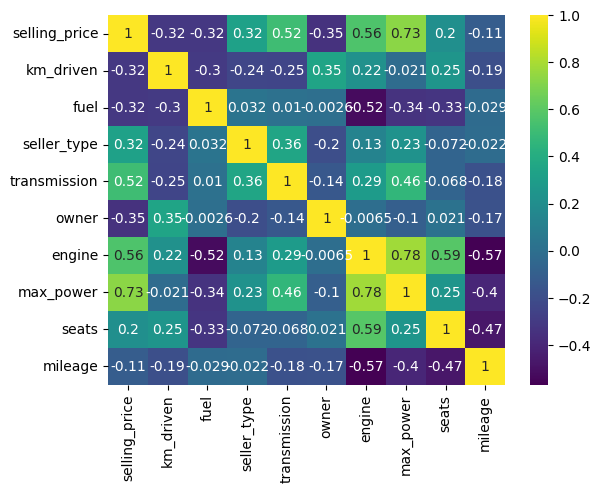

In [300]:
# heatmap
sns.heatmap(df1.corr(),annot=True,cmap="viridis")

In [301]:
# correlation in descending order
## positive correlation     ## negative correlation
# max_power                 # owner
# engine                    # fuel
# transmission              # km_driven
# seller_type               # mileage    
# seats

In [302]:
# it seems that the most positively correlated column which influence the target column is max_power while owner is the most negatively correlated

In [303]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [304]:
from sklearn.model_selection import train_test_split
x=df1.drop(columns=["selling_price"])
y=df1["selling_price"]

In [305]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [306]:
x_new_train=sc.fit_transform(xtrain)
x_new_test=sc.fit_transform(xtest)

In [307]:
from sklearn.feature_selection import SequentialFeatureSelector

In [308]:
from sklearn.linear_model import Ridge
ri=Ridge(alpha=0.1)

In [309]:
sfs=SequentialFeatureSelector(ri,n_features_to_select=5,scoring="r2",direction="forward",cv=5)

In [310]:
sfs.fit(x_new_train,ytrain)

SequentialFeatureSelector(estimator=Ridge(alpha=0.1), n_features_to_select=5,
                          scoring='r2')

In [311]:
indices_feature=sfs.get_support(indices=True)

In [312]:
lst=[]
for i in indices_feature:
    lst.append(df1.columns[i])

In [313]:
lst

['selling_price', 'km_driven', 'seller_type', 'transmission', 'engine']

In [314]:
# these are most imp columns influencing the target column

### Applying models

In [315]:
from sklearn.linear_model import LinearRegression

In [316]:
lr=LinearRegression()

In [317]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [318]:
lr.score(xtest,ytest)

0.7326122223757858

In [319]:
# getting 74% accuracy after applying linear regression

In [320]:
from sklearn.linear_model import Ridge

In [321]:
ri=Ridge()

In [322]:
ri.fit(xtrain,ytrain)

Ridge()

In [323]:
ri.score(xtest,ytest)

0.7325942747109582

In [324]:
# getting 74% accuracy after applying ridge regression

In [325]:
from sklearn.model_selection import GridSearchCV
Param_grid={'alpha': [0.1, 1.0, 10.0]}
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gr=GridSearchCV(estimator=ri,param_grid=Param_grid,scoring='r2',cv=kf)

In [326]:
gr.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [327]:
gr.best_params_

{'alpha': 1.0}

In [328]:
gr.best_score_

0.7247777035451654

In [329]:
# getting 72% accuracy after applying gridsearchcv

In [330]:
# Bagging 
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
model=[GradientBoostingRegressor(),
       Ridge(),
      XGBRegressor()]

In [331]:
trained_model=[]
for i in model:
    m=i.fit(xtrain,ytrain)
    trained_model.append(m)


In [332]:
score=[]
for i in trained_model:
    m=i.score(xtest,ytest)
    score.append(m)
score

[0.8424668277743098, 0.7325942747109582, 0.8994524087431786]

In [333]:
final_result=np.mean(score)

In [334]:
final_result

0.8248378370761489

In [335]:
# getting 80% accuracy after using Bagging

In [336]:
# stacking
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
estimators=[("ri",Ridge()),
           ("XGB",XGBRegressor()),
           ("svr",SVR())]
stack=StackingRegressor(estimators=estimators,final_estimator=LinearRegression())

In [337]:
stack.fit(xtrain,ytrain)

StackingRegressor(estimators=[('ri', Ridge()),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression())

In [338]:
stack.score(xtest,ytest)

0.9002273288394347

In [339]:
# getting 90% accuracy after applying stacking

In [348]:
#Cascading
from sklearn.multioutput import RegressorChain
base_reg=LinearRegression()
chain=RegressorChain(base_reg)
Ytrain=pd.DataFrame(ytrain)
chain.fit(xtrain,Ytrain)


RegressorChain(base_estimator=LinearRegression())

In [349]:
chain.score(xtrain,Ytrain)

0.7265296562569041

In [350]:
# after applyng cascading getting 72 percent accuracy